### Classification 分類
#### 監督式學習，答案無大小關係 (離散)

> <font color=blue size=2>CSV (Common Seperated Values)</font>
- 每個資料: 以逗點隔開
- 每筆資料: 以換行表示
- 含逗點的資料: 用雙引號括起來

#### <font color=red size=3>步驟一: 載入資料集，用pandas以表格呈現</font>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()  # 讀出來為字典

df = pd.DataFrame(iris["data"], # 直行
                  columns = iris["feature_names"]) # 橫列
df["ans"] = iris["target"] # 增加答案   df["ans"]答案從iris["target"]增加
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### <font color=red size=3>步驟二: 將資料切分兩部分: 拿來訓練的 和 拿來測試的</font>

In [2]:
from sklearn.model_selection import train_test_split
# train_test_split(arrays, options)
# test_size 多少部分要拿來測試
# 將資料分割成[90%題目, 10%題目, 90%答案, 10%答案]
data_train, data_test, target_train, target_test = train_test_split(iris["data"],   # x(題目)
                                                                    iris["target"], # y(答案)
                                                                    test_size=0.1)  # 10%

#### <font color=red size=3>步驟三: 使用DecisionTreeClassifier來訓練模型</font>
#### <font color=red size=3>步驟六: 用驗證分數修正max_depth</font>

In [3]:
from sklearn.tree import DecisionTreeClassifier

# 先試試將樹的最大深度設為3，之後依結果是否過擬合來判斷適不適合，再做出修正 (前剪枝)
clf = DecisionTreeClassifier(max_depth = 3)

# 餵資料讓他學習 (fit)
clf.fit(data_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### <font color=red size=3>步驟四:利用測試資料，驗證模型的正確率</font>

In [9]:
from sklearn.metrics import accuracy_score

# 把驗證的資料丟進剛剛訓練好的模型 (predict)
pre = clf.predict(data_test)  # x_test

print("預測結果:", list(pre))
print("真正結果:", list(target_test))

# 比較預測結果和正確答案 ->即模型的正確率
# 每次正確率都不一樣 -> 因為步驟二的資料切分是隨機的
accuracy_score(pre, target_test)  # y_test

預測結果: [1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0]
真正結果: [1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0]


1.0

#### <font color=red size=3>步驟五: 用第三方軟體Graphviz將決策樹畫出來</font>

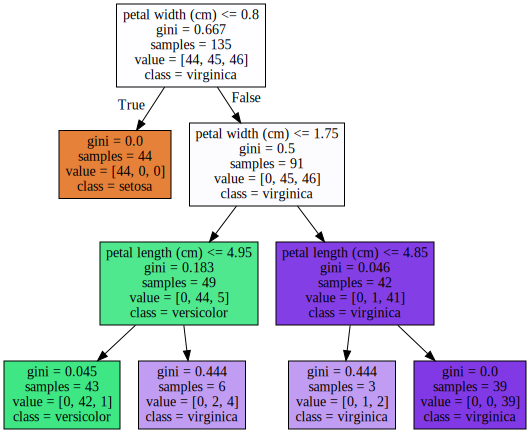

In [5]:
import graphviz
from sklearn.tree import export_graphviz

g = export_graphviz(clf, 
                    feature_names=iris["feature_names"],  # 特徵名字
                    class_names=iris["target_names"],     # 目標名字
                    filled=True)
graphviz.Source(g)

- samples = 資料筆數
- value = [第一種花數量, 第二種花數量, 第三種花數量]                    
 <font color=black size=2>**決策樹每層選擇一個特徵，使得信心程度最高</font>

### <font color=blue size=3>gini係數: 照著機率猜的平均錯誤率 = ∑ p(1-p)，因此gini係數越小越好</font>                     
 <font color=black size=2>*(補充)衡量亂度的另一種方式: Entropy(熵) = ∑plog(1/p) ->可以想成log版本的gini係數</font>         


### <font color=blue size=3>擬合 (訓練多寡): 訓練模型不是訓練到最好就是最好</font>     
- 必須適時放棄依些資料、掌握大方向 
- ex. 最後sample只有一個，特徵匹配牽強 => 過擬合
- 解決方法: (法一) 剪枝 (前剪枝) => 即步驟六的改變樹的最大深度，沒有公式可得知最佳深度，因此只能使用經驗法則判斷
- **後剪枝: sklearn不支援
- 解決方法: (法二) 隨機森林 

### <font color=blue size=3>決策樹的優點: 符合直覺，可解釋性高</font>